In [22]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from env import sql_connexion
import env

from sklearn.model_selection import train_test_split

# import my functions
import wrangle_no_acquire
import explore_zillow_sfh_2017

# importing scalers to allow for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy.stats import pearsonr, spearmanr

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [23]:
# obtaining the data from the created .csv for zillow single-family homes 2017 

zil = pd.read_csv('zillow_single_family_properties_2017.csv')

In [24]:
# obtaining the prepared zillow data

zil = wrangle_no_acquire.prep_zillow(zil)

In [ ]:
zil.head()
# what's in the cleaned dataframe

In [ ]:
zil.shape

# size of DataFrame

In [ ]:
zil.info()

**Continuous variables : area_sqft, tax_value, tax_amount.**  
**Discrete variables : no_br, no_ba, year_built, fips.**

### _Tax_value will be the target variable (y-axis)._

In [25]:
# list of continuous variables

con_vars = ['area_sqft', 'tax_value', 'tax_amount']

In [26]:
# list of discrete variables

disc_vars = ['no_br', 'no_ba', 'year_built', 'fips']

In [ ]:
# looking at the continuous variables using boxplots

for col in con_vars:
    
    plt.boxplot(zil[col])
    plt.title(f'{col} distribution')
    plt.show()

**There are some major outliers in 'area_sqft', 'tax_value', 'tax_amount'.**

In [ ]:
## looking at area_sqft outliers

zil[zil.area_sqft > 14_000]

# 350 outliers

In [ ]:
## looking at tax_value outliers

zil[zil.tax_value > 6_000_000]

# 3301 outliers

In [ ]:
## looking at tax_amount outliers

zil[zil.tax_amount > 70_000]

# 3814 outliers

In [27]:
# getting rid of area_sqft outliers

zil = zil[zil.area_sqft < 10_000]
zil

# 2128514 rows

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [28]:
# getting rid of tax_value outliers

zil = zil[zil.tax_value <=  5_000_000]
zil

# 2123847 rows

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [29]:
# getting rid of tax_amount outliers

zil = zil[zil.tax_amount <=  65_000]
zil

# 2123817 rows

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [ ]:
# shape after outliers removed

zil.shape

In [ ]:

# looking at the continuous variables using boxplots AFTER REMOVAL OF OUTLIERS

for col in con_vars:
    
    plt.boxplot(zil[col])
    plt.title(f'{col} distribution')
    plt.show()

In [ ]:
# looking at the continuous variables using histograms

for col in con_vars:
    
    plt.hist(zil[col], bins = 10000)
    plt.title(f'{col} distribution')
    plt.show()


**The distribution appears relatively normal for area_sqft, while tax_value and tax_amount are more right-skewed but still relatively normal.**

**_Note_ : I went through and graphed the data at different outlier levels, and decided on the current ones as accounting for the presence of the fact of outliers, but without them totally skewing the entire dataset.**

### Exercise 3 : Write a function named ```plot_variable_pairs``` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

1. split into train, val, test
2. do .corr on training dataset
3. make LMPLOTS of the data

In [ ]:
# # splitting acquired and prepared Zillow data into train, validate, test

train, validate, test = wrangle_no_acquire.tts_zillow(zil)

train.shape, validate.shape, test.shape

In [ ]:
# the .corr will by default use Pearson's R : desireable when data is normally distributed

# this computes pairwise correlation of columns

train_corr = train[con_vars].corr()
train_corr


In [ ]:
# plot the 'area_sqft' against target variable 'tax_value'

sns.lmplot(x = 'area_sqft', y = 'tax_value', data = train, line_kws={'color': 'purple'})


In [ ]:
# plot the 'tax_amount' against target variable 'tax_value'

sns.lmplot(x = 'tax_amount', y = 'tax_value', data = train, line_kws={'color': 'purple'})


In [ ]:
# # just for fun...

# # Create a dictionary mapping subgroup values to colors
# palette_colors = {"Rural": "green", "Urban": "blue"}

# # Create a count plot of school with location subgroups
# sns.countplot(x="school", data=student_data, hue="location", palette=palette_colors)

# # Display plot
# plt.show()


In [ ]:
# a function named 'plot_variable_pairs' that accepts a dataframe as input and plots all 
# of the pairwise relationships along with the regression line for each pair.


def plot_con_variable_pairs(zil):
    
    for col in zil:
        sns.lmplot(x = col, y = 'tax_amount', data = train.sample(n = 12000), line_kws = {'color': 'purple'})
        plt.title(f'{col} distribution')
        plt.show()

        # zil acts as a placeholder for an object, which is replaced with the variable name below.

In [ ]:
train.sample(n = 12000).head()

# how to pull random samples from train

In [ ]:
# visualising the function

plot_con_variable_pairs(con_vars)

**TAKEAWAY : Here, we see that area_sqft is spread widely across the chart, but that the distribution line is still relatively centred to tax_amount.  
As to tax_value, it is visible that it corresponds highly to tax_amount.**

.

### Exercise 4 : Write a function named ```plot_categorical_and_continuous_vars``` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
print(disc_vars)

In [ ]:
# comparing discrete variable against the target variable of 'tax_amount'

sns.swarmplot(x = 'no_br', y = 'tax_amount', data = train.sample(n = 1200), 
              hue = 'tax_amount', palette = 'Oranges')

# removing the legend

plt.legend([],[], frameon = False)

KeyboardInterrupt: 

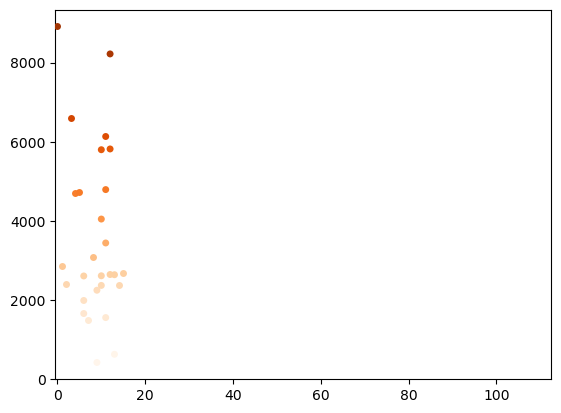

In [30]:
# comparing discrete variable 'year_built' against the target variable of 'tax_amount'

sns.swarmplot(x = 'year_built', y = 'tax_amount', data = train.sample(n = 1200), 
              hue = 'tax_amount', palette = 'Oranges')

# removing the legend

plt.legend([],[], frameon = False)

In [ ]:
# a function named 'plot_categorical_and_continuous_vars' that accepts a dataframe 
# as input and plots the categorical / discrete variables against the continuous 
# target variable of 'tax_amount'.

def plot_categorical_and_continuous_vars(zil):
    
    for col in zil:
        sns.swarmplot(x = col, y = 'tax_amount', data = train.sample(n = 900), 
               hue = 'tax_amount', palette = 'Oranges')
        
        # removing the legend
        plt.legend([],[], frameon = False)

        plt.title(f'{col} distribution')
                  
        plt.show()

In [ ]:
# plotting the discrete variables using the function 'plot_categorical_and_continuous_vars(zil)'.

plot_categorical_and_continuous_vars(disc_vars)

# stopped this cell's running because 5 minutes is too long to wait

### Exercise 6 : Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [ ]:
# checking to see if the continuous-continuous function previously created work when imported

explore_zillow_sfh_2017.plot_con_variable_pairs(train)

In [ ]:
# checking to see if the discrete-continuous function previously created work when imported

explore_zillow_sfh_2017.plot_categorical_and_continuous_vars(train)

# stopped this cell's running because 5 minutes is too long to wait for the final chart.

### 7. Come up with some initial hypotheses based on your goal of predicting property value.


**AREA_SQFT :** $H_{0}$ : There is no relationship between the area in square feet of the house and its tax value.  

$H_{a}$ : There is a relationship between the area in square feet of the house and its tax value.  


**TAX_VALUE :** $H_{0}$ : There is no relationship between the tax amount of the house and its tax value.

$H_{a}$ : There is a relationship between the tax amount of the house and its tax value.


**YEAR_BUILT :** $H_{0}$ : There is no relationship between the year that the house was built and its tax value.

$H_{a}$ : There is a relationship between the year that the house was built and its tax value.


**NO_BR :** $H_{0}$ : There is no relationship between the number of bedrooms in the house and its tax value.

$H_{a}$ : There is a relationship between the number of bedrooms in the house and its tax value.


**NO_BA :** $H_{0}$ : There is no relationship between the number of bathrooms in the house and its tax value.

$H_{a}$ : There is a relationship between the number of bathrooms in the house and its tax value.

### 8 . Visualize all combinations of variables in some way.

In [39]:
sns.pairplot(data = train, hue = 'tax_value', corner = True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x15c949b80> (for post_execute):


KeyboardInterrupt: 

### 9. Run the appropriate statistical tests where needed.

In [38]:
# setting the alpha value to 0.05

α = 0.05

In [33]:
# Use Pearson's R test to calculate the correlation coefficient and the p-value of year_built against tax_value

r_yb, p_value_yb = pearsonr(train.year_built, train.tax_value)
print(f'Correlation coefficient for year built and tax value: {r_yb}\nP-value : {p_value_yb}')


Correlation coefficient for year built and tax value: 0.24879473585177336
P-value : 0.0


There is no p-value.  

How's this ?


In [37]:
# Use Pearson's R test to calculate the correlation coefficient and the p-value of no_br against tax_value

r_br, p_value_br = pearsonr(train.no_br, train.tax_value)
print(f'Correlation coefficient for number of bedrooms and tax value: {r_br}\nP-value : {p_value_br}')


Correlation coefficient for number of bedrooms and tax value: 0.2896427805018058
P-value : 0.0


In [43]:
# Use Pearson's R test to calculate the correlation coefficient and the p-value of no_ba against tax_value

r_ba, p_value_ba = pearsonr(train.no_ba, train.tax_value)
print(f'Correlation coefficient for number of bathrooms and tax value: {r_ba}\nP-value : {p_value_ba}')


Correlation coefficient for number of bathrooms and tax value: 0.5543939841778406
P-value : 0.0


In [44]:
# Use Pearson's R test to calculate the correlation coefficient and the p-value of area_sqft against tax_value

r_sqft, p_value_sqft = pearsonr(train.area_sqft, train.tax_value)
print(f'Correlation coefficient for the area in square feet and tax value: {r_sqft}\nP-value : {p_value_sqft}')


Correlation coefficient for the area in square feet and tax value: 0.6323468690284602
P-value : 0.0


In [45]:
# Use Pearson's R test to calculate the correlation coefficient and the p-value of tax_amount against tax_value

r_ta, p_value_ta = pearsonr(train.tax_amount, train.tax_value)
print(f'Correlation coefficient for the tax amount and tax value: {r_ta}\nP-value : {p_value_ta}')


Correlation coefficient for the area in square feet and tax value: 0.9865367467523772
P-value : 0.0


In [48]:
# Use Pearson's R test to calculate the correlation coefficient and the p-value of fips against tax_value

r_f, p_value_f = pearsonr(train.fips, train.tax_value)
print(f'Correlation coefficient for the FIPS and tax value: {r_f}\nP-value : {p_value_f}')


Correlation coefficient for the area in square feet and tax value: 0.041957360025759914
P-value : 0.0


**TAKEAWAYS :**  

The low correlation coefficient of less than 0.30 for 'year_built', 'no_br' indicates that there is a very low, almost no, correlation. Though, the p-value is 0, which would indicate that the null hypothesis could be rejected and that there IS a relationship.  
 
For number of bathrooms, the correlation coefficient is 0.5544, which indicates a moderate correlation. However, the p-value is also 0.  
 
For the area in square feet, the correlation coefficient is 0.6323, which indicates a moderate correlation. However, the p-value is also 0.  


For the tax value, the correlation coefficient is 0.9865, which indicates a very strong correlation. However, the p-value is also 0.  


The extremely low correlation coefficient of less than 0.0420 for the FIPS code indicates that there is a very low, almost no, correlation. However, the p-value is also 0.  


**The home's area in square feet has the highest correlation to tax value, at 0.9865, followed by number of bathrooms, at 0.5544.**





### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [58]:
# Use Pearson's R test to calculate the correlation coefficient and the p-value
# of number of bedrooms against number of bathrooms

r_brba, p_value_brba = pearsonr(train.no_br, train.no_ba)
print(f'Correlation coefficient for the number of bedrooms against number of bathrooms : {r_brba}\nP-value : {p_value_brba}')


Correlation coefficient for the number of bedrooms against number of bathrooms : 0.6391499917120302
P-value : 0.0


In [56]:
# Use Pearson's R test to calculate the correlation coefficient and the 
# p-value of year_built against number of bathrooms

r_yrba, p_value_yrba = pearsonr(train.year_built, train.no_ba)
print(f'Correlation coefficient for the year built against number of bathrooms : {r_yrba}\nP-value : {p_value_yrba}')


Correlation coefficient for the year built against number of bathrooms : 0.5167134188395176
P-value : 0.0


In [55]:
# Use Pearson's R test to calculate the correlation coefficient and the 
# p-value of year_built against number of bedrooms

r_yrbr, p_value_yrbr = pearsonr(train.year_built, train.no_br)
print(f'Correlation coefficient for the year built against number of bedrooms : {r_yrbr}\nP-value : {p_value_yrbr}')


Correlation coefficient for the year built against number of bedrooms : 0.37760426988197465
P-value : 0.0


In [57]:
# Use Pearson's R test to calculate the correlation coefficient and the 
# p-value of year_built against number of bedrooms

r_yrf, p_value_yrf = pearsonr(train.year_built, train.fips)
print(f'Correlation coefficient for the year built against the FIPS code : {r_yrf}\nP-value : {p_value_yrf}')


Correlation coefficient for the year built against the FIPS code : 0.30134822727056787
P-value : 0.0


**TAKEAWAYS :**  
There is a moderate correlation between the year that the home was built and the number of bathrooms (correlation coefficient of 0.5167), while the number of bedrooms to the year built only has a mild correlation (0.3776).  

Year built and FIPS code also have only a mild correlation (0.3013).  

Number of bedrooms against number of bathrooms, however, has a moderate correlation (0.6391).